In [3]:
# import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read the file dirty_cafe_sales_cleaned_data.csv
df = pd.read_csv("dirty_cafe_sales_cleaned_data.csv")
df.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,4.0,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,Digital Wallet,Takeaway,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [48]:
# mean for Total Spent, Quantity for each Item
groupby_Item = df.groupby('Item')[['Total Spent','Quantity']].mean()
display(groupby_Item)

,Total Spent,Quantity
Item,,
Cake,9.150794,3.050265
Coffee,6.094991,3.047496
Cookie,2.969557,2.969557
Juice,9.005141,3.001714
Salad,15.135490,3.027098
Sandwich,12.160428,3.040107
Smoothie,12.209366,3.052342
Tea,4.559667,3.039778
UNKNOWN_ITEM,8.778297,2.998962


In [7]:
# Descriptive Statistics
df.describe()

,Quantity,Price Per Unit,Total Spent
count,9942.000000,9942.000000,9942.000000
mean,3.025749,2.947848,8.931855
std,1.420438,1.279897,6.002356
min,1.000000,1.000000,1.000000
25%,2.000000,2.000000,4.000000
50%,3.000000,3.000000,8.000000
75%,4.000000,4.000000,12.000000
max,5.000000,5.000000,25.000000


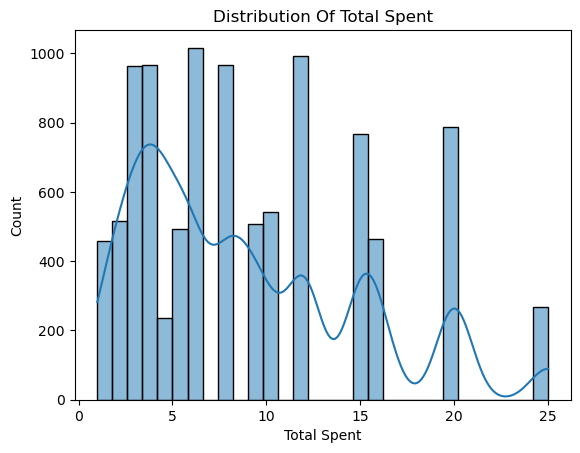

In [9]:
# use histogram to see the distribution of the numeric variable (Quantity, Price Per Unit, Total Spent)
sns.histplot(df['Total Spent'], bins = 30, kde = True)
plt.title("Distribution Of Total Spent")
plt.show()

Most customers spend a relatively small amount (around 3–5 units), and higher spending transactions are less frequent. The spending behavior shows some repeating patterns, likely due to menu pricing. The distribution is right-skewed with multiple small peaks, hinting at common purchase amounts.

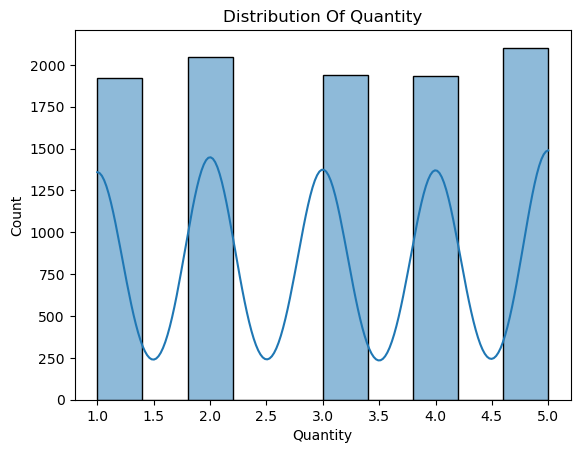

In [12]:
sns.histplot(df['Quantity'], bins = 10, kde = True)
plt.title("Distribution Of Quantity")
plt.show()

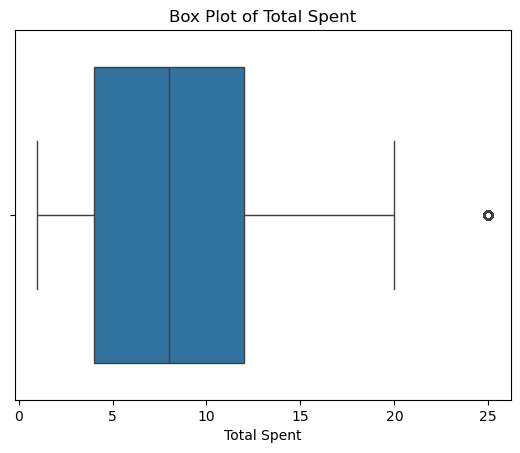

In [13]:
# using boxplot to identify the outiler
sns.boxplot(x=df['Total Spent'])
plt.title('Box Plot of Total Spent')
plt.show()

This box plot show us that a typical customer spends between 4 and 12, but there was at least one customer who spent an unusually high amount of around 25. The presence of this high-value outlier suggests the data is slightly right-skewed.

C:\Users\ppctc\AppData\Local\Temp\ipykernel_1156\2179402265.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Item', data = df, palette = type_colors)


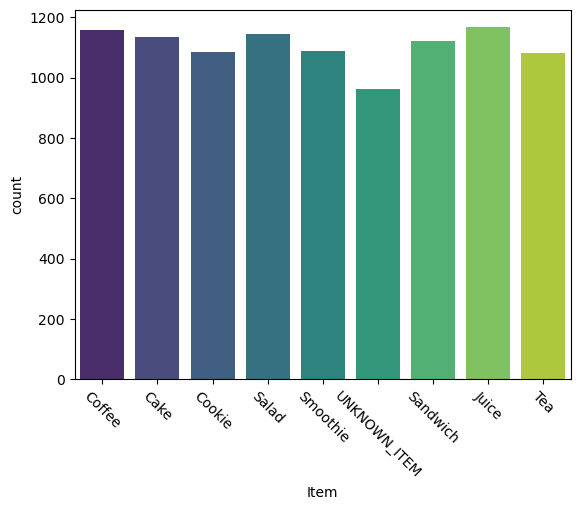

In [20]:
# using bar chart to see the frequency of categories: Item, Payment Method, Location
type_colors = 'viridis'
sns.countplot(x = 'Item', data = df, palette = type_colors)
plt.xticks(rotation = -45)
plt.show()

The plot indicates that beverages (Coffee, Tea, Juice, Smoothie) and food items (Sandwich, Cake, Cookie, Salad) are both popular, but hot beverages like coffee and tea are the clear top sellers.

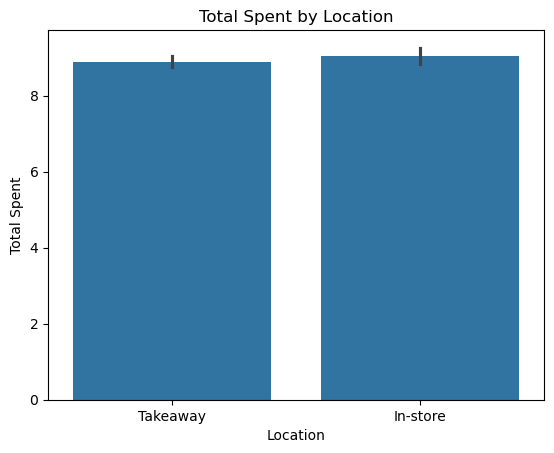

In [21]:
# use barplot to see sales differs between diffrent location
sns.barplot(x='Location', y='Total Spent', data=df)
plt.title('Total Spent by Location')
plt.show()

The average "Total Spent" for both Takeaway and In-store orders is very similar, with both bars reaching a height of nearly 9 and for the Total Spent In-store is a little bit higher

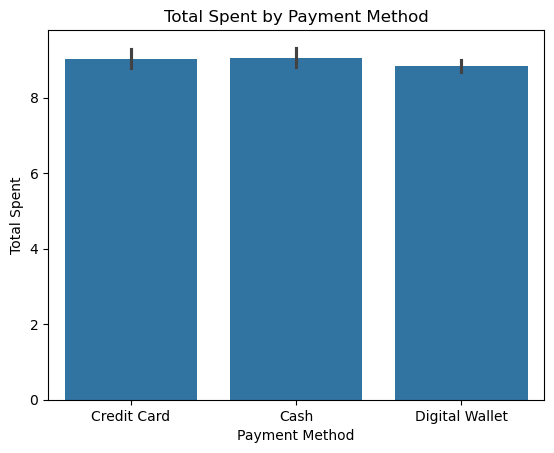

In [22]:
# use barplot to see sales differs between diffrent Payment Mthod
sns.barplot(x='Payment Method', y='Total Spent', data=df)
plt.title('Total Spent by Payment Method')
plt.show()

The three method for paying are almost the same, and the least common one is Digital Wallet

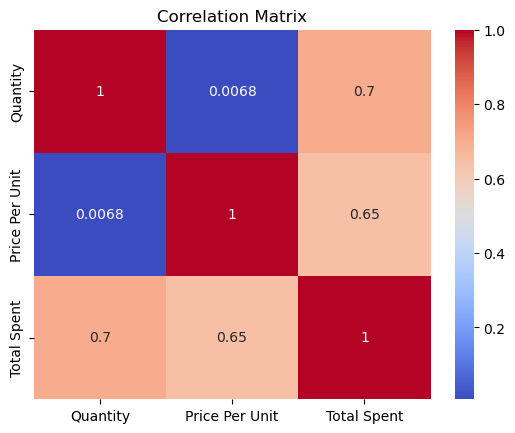

In [23]:
# sale base on the Quantity and Total Spent: Does the higher Quantity lead to high Total Spent?
numerical_df = df[['Quantity', 'Price Per Unit', 'Total Spent']]
correlation_matrix = numerical_df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows that the Total Spent by a customer is strongly influenced by two factors:
. Quantity: a strong positive correlation (0.7) between the Quantity of items purchased and the Total Spent. Simply put, the more items a customer buys, the higher their bill will be.
. Price Per Unit: There is also a positive correlation (0.65) between the Price Per Unit and the Total Spent. This means that buying more expensive items also leads to a higher total bill.

--> the price of an item doesn't affect how many of it a customer buys.

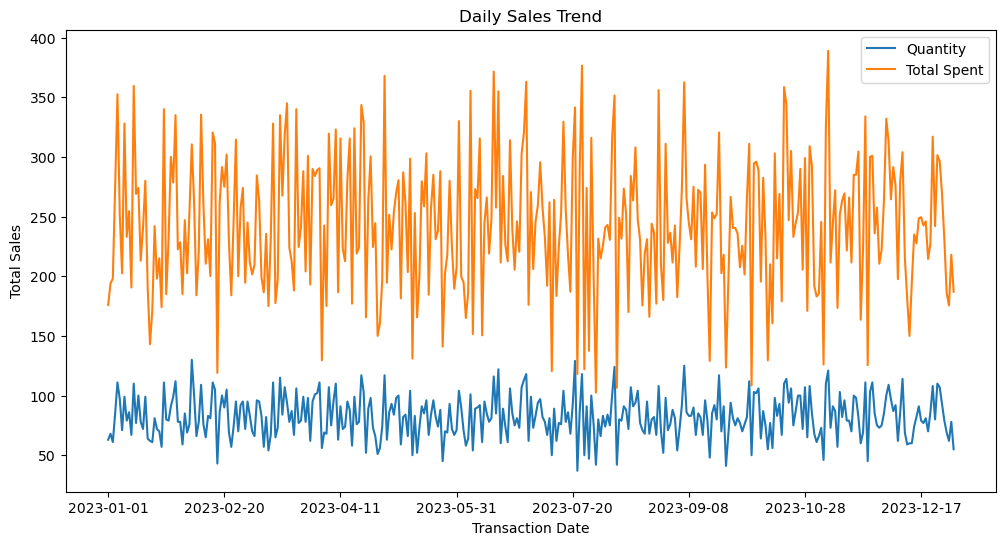

In [28]:
# Sale Over Time
df_time = df.set_index('Transaction Date')
# daily_sales = df_time.groupby(['Total Spent']).sum()
daily_sales = df.groupby('Transaction Date')[['Quantity', 'Total Spent']].sum()

daily_sales.plot(figsize=(12, 6))
plt.title('Daily Sales Trend')
plt.ylabel('Total Sales')
plt.show()

In [32]:
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9942 entries, 0 to 9941
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    9942 non-null   object        
 1   Item              9942 non-null   object        
 2   Quantity          9942 non-null   int64         
 3   Price Per Unit    9942 non-null   float64       
 4   Total Spent       9942 non-null   float64       
 5   Payment Method    9942 non-null   object        
 6   Location          9942 non-null   object        
 7   Transaction Date  9942 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 621.5+ KB


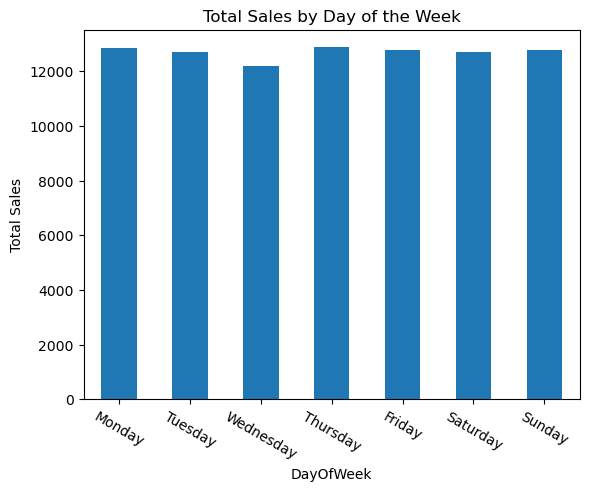

In [38]:
df['DayOfWeek'] = df['Transaction Date'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['Total Spent'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

sales_by_day.plot(kind='bar')
plt.title('Total Sales by Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation = -30)
plt.show()

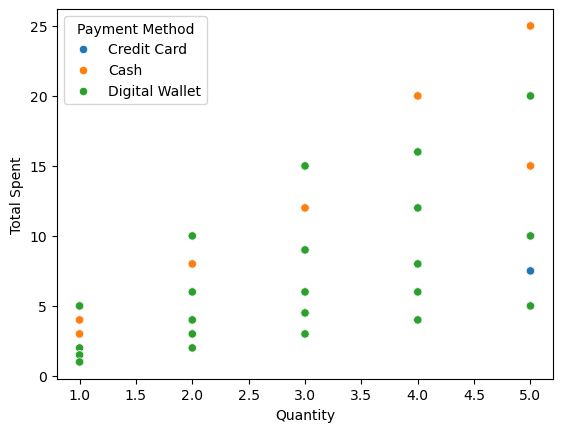

In [36]:
# using scartter plot 
sns.scatterplot(x = 'Quantity', y = 'Total Spent', hue = 'Payment Method', data = df)
plt.show()